# Implementation of clustering algorithms

Build K-Means and Agglomerative Clustering models to perform an unsupervised clustering by using given data. Follow below steps as a guideline for building your model and explain each of them in code lines. 

* Data cleaning (25 points)

Start with data cleaning to ensure that your data is correct, consistent and usable. The techniques used for data cleaning may vary but you can consider to follow these basic steps: handling missing values, encoding categorical features, extracting useful features by using existing features, handling outliers etc.

* Data Preprocessing (25 points)

In this step you should transform raw data into an understandable format for machine learning algorithms. This step may include scaling the features, performing dimensionality reduction etc.

* Clustering (30)

The goal of this step is to find distinct groups or “clusters” within a data set by using K-Means and Agglomerative Clustering Algorithms. Apply Elbow Method to determine the number of clusters. After building models, examine and comment the clusters formed via scatter plot.

* Silhouette Scores (20)

To evaluate how “well clustered” data points are, use the “silhouette score” and plot the Silhouette Scores for all of data points.

Note: Don't forget to explain your codes and comment on the obtained result.

# Importing libraries 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading and data cleaning


In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [242]:
df = pd.read_csv('data.csv')
#In This line I dropped the columns that we do not need.
df = df.drop(["Unnamed: 0","ID","Dt_Customer","Z_CostContact","Z_Revenue"], axis =1)
#I fill the Income cause it has nan values
df["Income"].fillna(df["Income"].median(),inplace = True)
#I dropped the outliers That I saw on graph
df.drop(df[df["Year_Birth"]<1941].index, inplace =True)
df.drop(df[df["Income"]>105471].index, inplace =True)
df.drop(df[df["NumWebPurchases"]>11].index, inplace =True)
df.drop(df[df["NumCatalogPurchases"]>11].index, inplace =True)
df.drop(df[df["NumWebVisitsMonth"]>11].index, inplace =True)

In [243]:
# I replaced the column values with 1-2-3-4-5 as categorie cause I wanted to reduse column number
df.replace(to_replace ="Basic",
                 value =0, inplace = True)
df.replace(to_replace ="Graduation",
                 value =1, inplace = True)
df.replace(to_replace ="PhD",
                 value =2, inplace = True)
df.replace(to_replace ="Master",
                 value =3, inplace = True)
df.replace(to_replace ="2n Cycle",
                 value =4, inplace = True)
df.replace(to_replace ="Alone",
                 value =0, inplace = True)
df.replace(to_replace ="Single",
                 value =1, inplace = True)
df.replace(to_replace ="Together",
                 value =2, inplace = True)
df.replace(to_replace ="Married",
                 value =3, inplace = True)
df.replace(to_replace ="Divorced",
                 value =4, inplace = True)
df.replace(to_replace ="Widow",
                 value =5, inplace = True)
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,1,1,58138.0,0,0,58,635,88,546,...,10,4,7,0,0,0,0,0,0,1
1,1954,1,1,46344.0,1,1,38,11,1,6,...,1,2,5,0,0,0,0,0,0,0
2,1965,1,2,71613.0,0,0,26,426,49,127,...,2,10,4,0,0,0,0,0,0,0
3,1984,1,2,26646.0,1,0,26,11,4,20,...,0,4,6,0,0,0,0,0,0,0
4,1981,2,3,58293.0,1,0,94,173,43,118,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,1978,1,2,75437.0,0,0,25,795,0,545,...,4,10,6,0,0,0,1,0,0,0
997,1957,1,2,26091.0,1,1,84,15,10,19,...,1,3,5,0,0,0,0,0,0,0
998,1973,1,3,52845.0,1,0,7,384,25,292,...,8,6,6,1,0,0,0,0,0,0
999,1956,1,4,46086.0,0,1,34,244,8,32,...,1,8,4,0,0,0,0,0,0,0


In [244]:
df.insert(4, "Spent", df.iloc[:,7:13].sum(axis=1))
df.drop(df.iloc[:,8:14], axis =1 , inplace = True)

df

,Year_Birth,Education,Marital_Status,Income,Spent,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,1,1,58138.0,1617,0,0,58,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,1,1,46344.0,27,1,1,38,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,1,2,71613.0,776,0,0,26,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,1,2,26646.0,53,1,0,26,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,2,3,58293.0,422,1,0,94,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,1978,1,2,75437.0,1493,0,0,25,1,8,4,10,6,0,0,0,1,0,0,0
997,1957,1,2,26091.0,89,1,1,84,3,2,1,3,5,0,0,0,0,0,0,0
998,1973,1,3,52845.0,936,1,0,7,3,8,8,6,6,1,0,0,0,0,0,0
999,1956,1,4,46086.0,343,0,1,34,4,3,1,8,4,0,0,0,0,0,0,0


# Data Preprocessing

In [245]:
corr = df.corr()

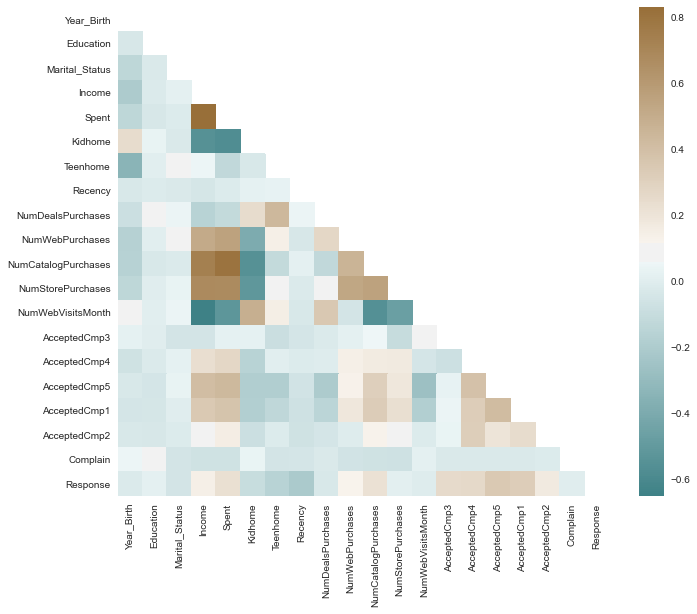

In [246]:
# This is the heatmap 
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# I set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# I generate a custom diverging colormap
cmap = sns.diverging_palette(200, 50, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap,)


In [247]:
from sklearn.preprocessing import StandardScaler
#I scaled my data because the all data has different ranges.
scaler = StandardScaler()
Scaled_df = scaler.fit_transform(df)
df = pd.DataFrame(Scaled_df, columns = df.columns)

In [248]:
df_scaled = pd.DataFrame(df,columns=df.columns)
df_scaled.head()

,Year_Birth,Education,Marital_Status,Income,Spent,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,-1.017969,-0.778030,-1.373378,0.286956,1.676791,-0.813694,-0.875006,0.310109,0.423718,1.528119,2.580155,-0.590808,0.774430,-0.260834,-0.288517,-0.26957,-0.263038,-0.119829,-0.084429,2.515139
1,-1.272526,-0.778030,-1.373378,-0.287343,-0.982099,0.974625,0.931635,-0.384248,-0.152702,-1.164466,-0.609119,-1.212412,-0.102903,-0.260834,-0.288517,-0.26957,-0.263038,-0.119829,-0.084429,-0.397592
2,-0.339152,-0.778030,-0.443056,0.943111,0.270422,-0.813694,-0.875006,-0.800863,-0.729121,1.528119,-0.254755,1.274007,-0.541569,-0.260834,-0.288517,-0.26957,-0.263038,-0.119829,-0.084429,-0.397592
3,1.273041,-0.778030,-0.443056,-1.246522,-0.938620,0.974625,-0.875006,-0.800863,-0.152702,-0.779811,-0.963482,-0.590808,0.335764,-0.260834,-0.288517,-0.26957,-0.263038,-0.119829,-0.084429,-0.397592
4,1.018484,0.193525,0.487267,0.294504,-0.321557,0.974625,-0.875006,1.559952,1.576556,0.374154,0.099609,0.030797,-0.102903,-0.260834,-0.288517,-0.26957,-0.263038,-0.119829,-0.084429,-0.397592


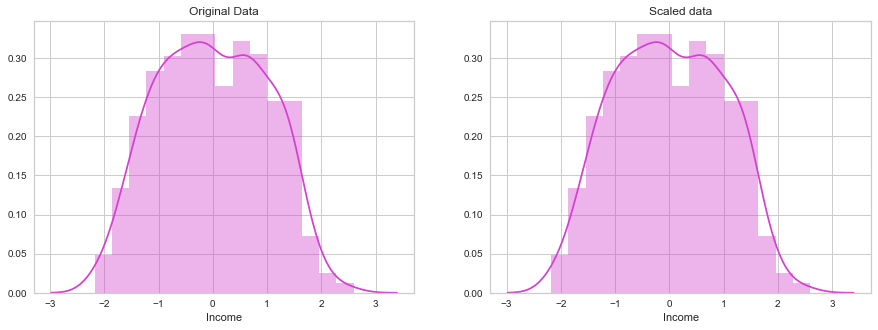

In [249]:
#I plotted graph for looking the graph seeing the difference between 2 plot
fig, ax=plt.subplots(1,2,figsize=(15,5))
sns.distplot(df['Income'], ax=ax[0],color='#D341CD')
ax[0].set_title("Original Data")
sns.distplot(df_scaled['Income'], ax=ax[1],color='#D341CD')
ax[1].set_title("Scaled data")
plt.show()

# Data Clustering and Silhoutte Scores



In [250]:
from sklearn.cluster import KMeans
#I take n_cluster 2 cause I predict before seeing this.
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(df)

KMeans(n_clusters=2, random_state=0)

In [251]:
"""kmeans.labels_"""

'kmeans.labels_'

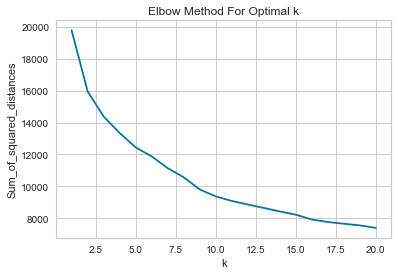

In [252]:
#Here is the elbow graph for choosing optimal value of n_cluster
Sum_of_squared_distances = []
K = range(1,21)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [253]:
from sklearn.metrics import silhouette_score, silhouette_samples
#Here is the silhouette scores as we see n_clusters = 2 is the best score.
#The scores of first 6-7 is okey but after that scores are decreased 
#The max score n_clusters = 2 is 0.204 my best score.
#I took that with cleaning and propreccesing data. 
#On every step my score is increased
for n_clusters in range(2,21):
    km = KMeans (n_clusters=n_clusters)
    preds = km.fit_predict(df)
    centers = km.cluster_centers_

    score = silhouette_score(df, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.2041751972165788
For n_clusters = 3, silhouette score is 0.19580477390324688
For n_clusters = 4, silhouette score is 0.1604664687398374
For n_clusters = 5, silhouette score is 0.17118771703515645
For n_clusters = 6, silhouette score is 0.18095208848613514
For n_clusters = 7, silhouette score is 0.18478422213268347
For n_clusters = 8, silhouette score is 0.14298220757533062
For n_clusters = 9, silhouette score is 0.14390021982848272
For n_clusters = 10, silhouette score is 0.14831697526247123
For n_clusters = 11, silhouette score is 0.138943538599365
For n_clusters = 12, silhouette score is 0.14502905664483576
For n_clusters = 13, silhouette score is 0.1394678849454945
For n_clusters = 14, silhouette score is 0.14958128175289895
For n_clusters = 15, silhouette score is 0.14613540643555017
For n_clusters = 16, silhouette score is 0.14129868327478892
For n_clusters = 17, silhouette score is 0.1408176403443988
For n_clusters = 18, silhouette score 

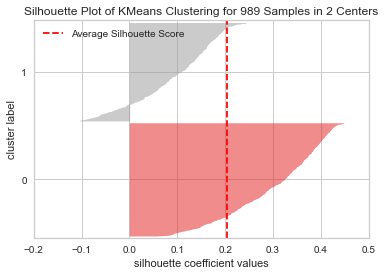

In [254]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
km = KMeans (n_clusters=2)
visualizer = SilhouetteVisualizer(km)

visualizer.fit(df) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

In [255]:
km = KMeans(n_clusters=2)
km.fit(df)

KMeans(n_clusters=2)

In [256]:
cluster_label = km.labels_
df['KMEANS_LABELS'] = cluster_label
df.head()

,Year_Birth,Education,Marital_Status,Income,Spent,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,KMEANS_LABELS
0,-1.017969,-0.778030,-1.373378,0.286956,1.676791,-0.813694,-0.875006,0.310109,0.423718,1.528119,...,-0.590808,0.774430,-0.260834,-0.288517,-0.26957,-0.263038,-0.119829,-0.084429,2.515139,0
1,-1.272526,-0.778030,-1.373378,-0.287343,-0.982099,0.974625,0.931635,-0.384248,-0.152702,-1.164466,...,-1.212412,-0.102903,-0.260834,-0.288517,-0.26957,-0.263038,-0.119829,-0.084429,-0.397592,1
2,-0.339152,-0.778030,-0.443056,0.943111,0.270422,-0.813694,-0.875006,-0.800863,-0.729121,1.528119,...,1.274007,-0.541569,-0.260834,-0.288517,-0.26957,-0.263038,-0.119829,-0.084429,-0.397592,0
3,1.273041,-0.778030,-0.443056,-1.246522,-0.938620,0.974625,-0.875006,-0.800863,-0.152702,-0.779811,...,-0.590808,0.335764,-0.260834,-0.288517,-0.26957,-0.263038,-0.119829,-0.084429,-0.397592,1
4,1.018484,0.193525,0.487267,0.294504,-0.321557,0.974625,-0.875006,1.559952,1.576556,0.374154,...,0.030797,-0.102903,-0.260834,-0.288517,-0.26957,-0.263038,-0.119829,-0.084429,-0.397592,1


In [257]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Spent',
       'Kidhome', 'Teenhome', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',
       'KMEANS_LABELS'],
      dtype='object')

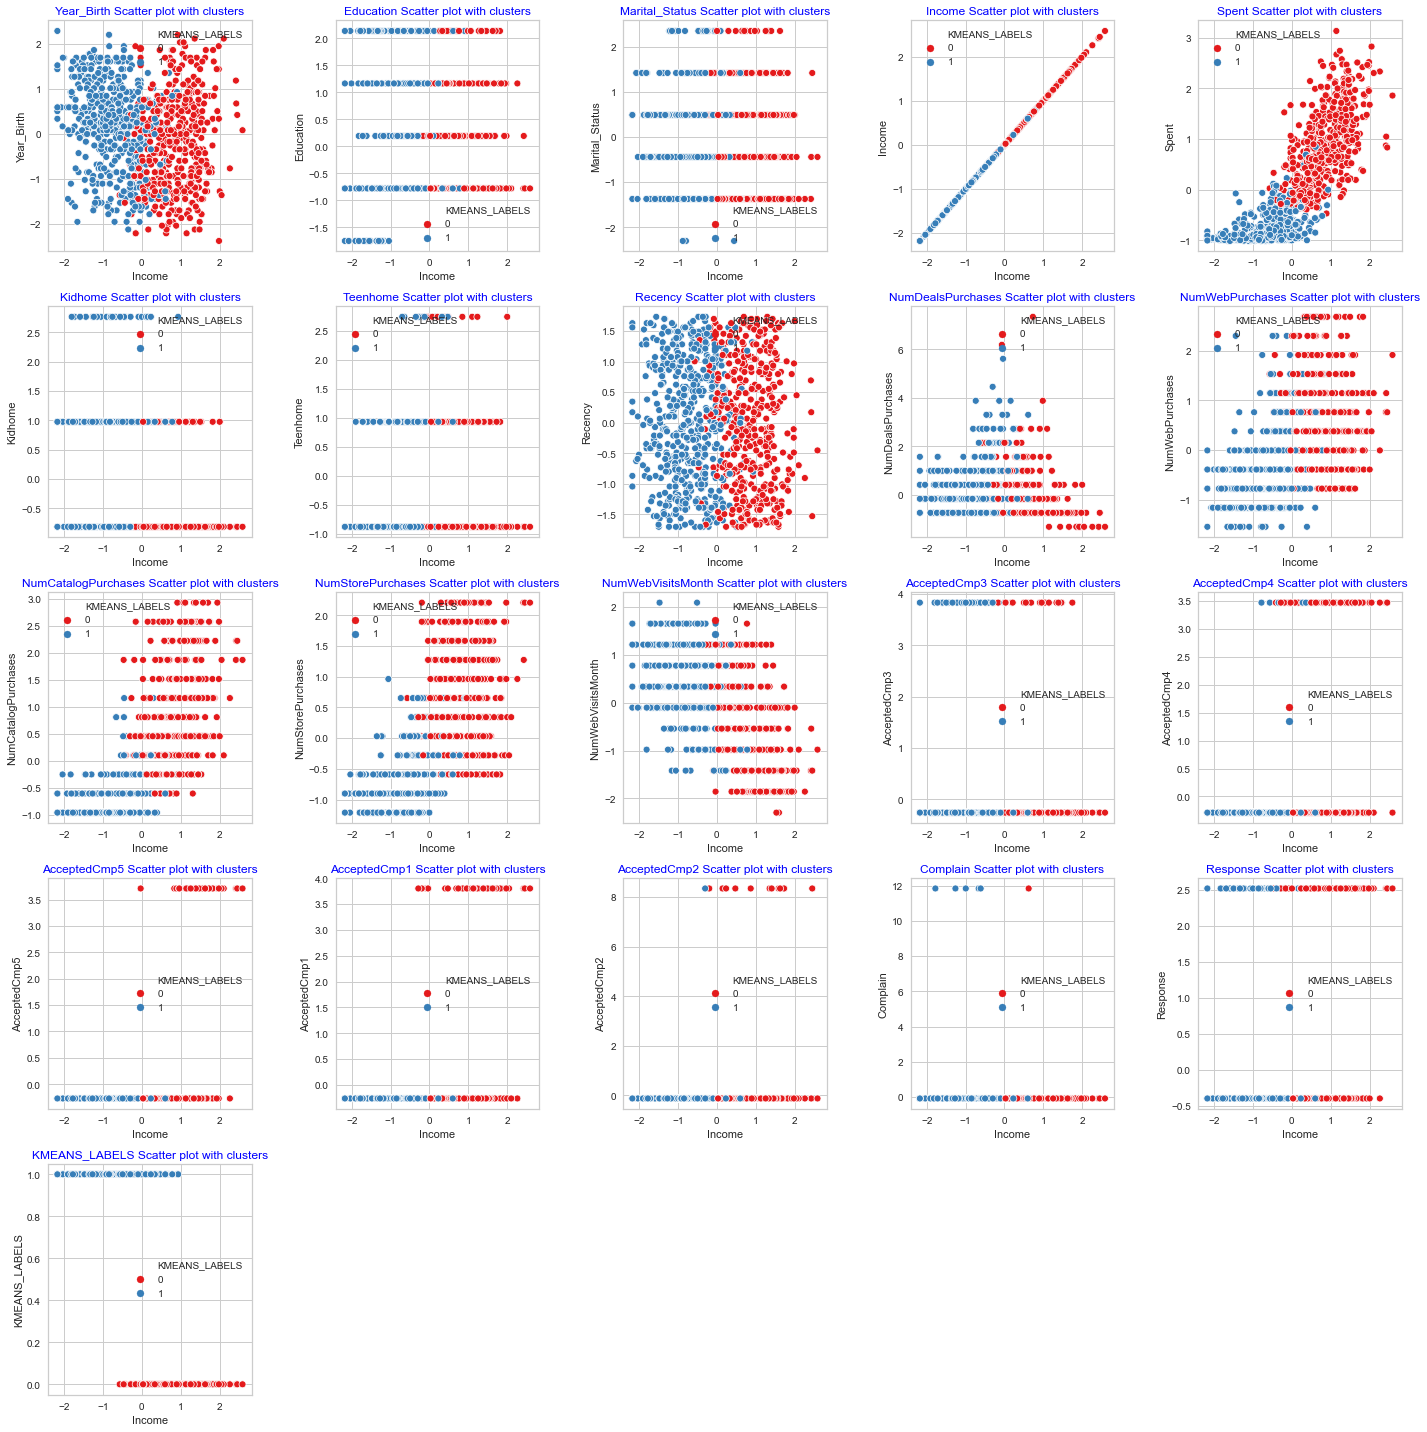

In [258]:
#These are the scatter plots of data all columns specially
f=plt.figure(figsize=(20,20))
scatter_cols =['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Spent',
       'Kidhome', 'Teenhome', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',
       'KMEANS_LABELS']
for i, col in enumerate(scatter_cols):
    ax=f.add_subplot(5,5,i+1)
    sns.scatterplot(x=df['Income'],y=df[col],hue=df['KMEANS_LABELS'],palette='Set1')
    ax.set_title(col+" Scatter plot with clusters",color='blue')
    plt.ylabel(col)
f.tight_layout()

In [259]:
#K Means on selected features
sample_df = pd.DataFrame([df['Income'],df['Spent']])
sample_df = sample_df.T
sample_df.head()

,Income,Spent
0,0.286956,1.676791
1,-0.287343,-0.982099
2,0.943111,0.270422
3,-1.246522,-0.938620
4,0.294504,-0.321557


In [260]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Sample_Scaled_df = scaler.fit_transform(sample_df)


In [261]:
km_sample = KMeans(n_clusters=2)
km_sample.fit(Sample_Scaled_df)

KMeans(n_clusters=2)

In [262]:
labels_sample = km_sample.labels_
sample_df['label'] = labels_sample

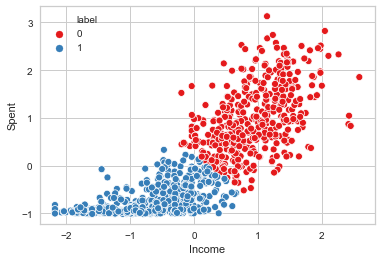

In [263]:
#Here is my graph with 2 clusters. It seems okey and there is no outlier in data.
sns.set_palette('Set2')
sns.scatterplot(sample_df['Income'],sample_df['Spent'],hue=sample_df['label'],palette='Set1')


In [264]:
sample_df.shape

(989, 3)

In [265]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

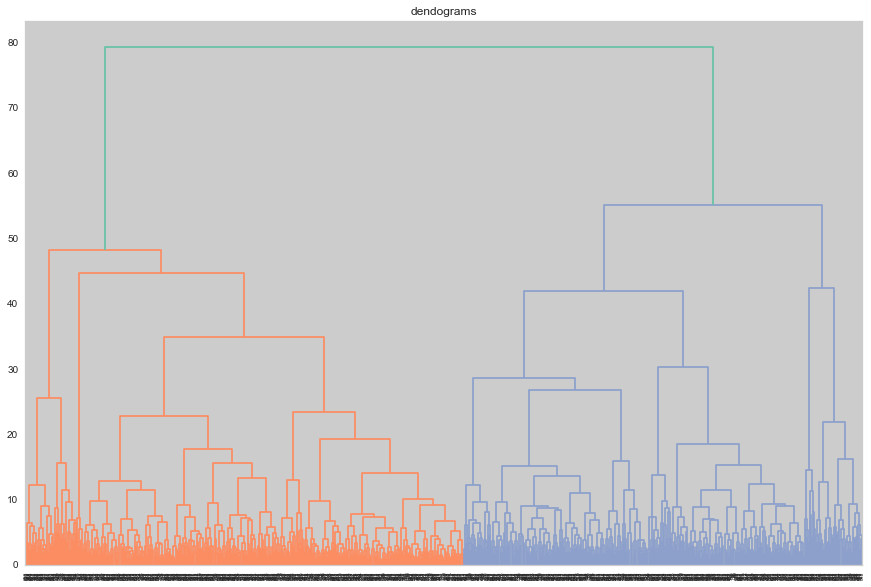

In [266]:
#Here is dendogram
plt.figure(figsize=(15,10))
plt.title("dendograms")
dendrogram = shc.dendrogram(shc.linkage(df, method='ward'))

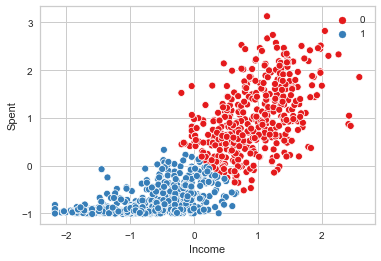

In [267]:
#Clustering is successfully created.
#

aggCluster = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
result = aggCluster.fit_predict(sample_df)
sns.scatterplot(x=sample_df['Income'], y=sample_df['Spent'], hue = result, palette = 'Set1')
plt.show()

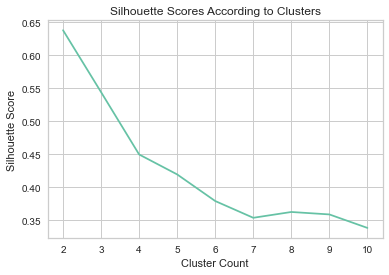

In [268]:
#Clusters are in dense
#It was outliers in graph before than I detect and drop them
#Maybe variance and standar deviation is low because in the graphs it seems correct.
silhouette_scores = []
for n_clusters in range(2,11):
    cluster = AgglomerativeClustering(n_clusters=n_clusters)  
    a = cluster.fit_predict(sample_df)
    silhouette_scores.append(silhouette_score(sample_df, a))
    
plt.plot(range(2,11), silhouette_scores)
plt.title("Silhouette Scores According to Clusters")
plt.xlabel("Cluster Count")
plt.ylabel("Silhouette Score")
plt.show()

In [ ]:
# Here is the table of scores (Silhoutte Scores)
# It seems picks in 2 after decreases.
# In this my scores are approximately 0.65 that is sample dataframe
# In all data it was 0.20 than the data members are collected in common, low number categories the score comes high.